In [1]:
import pennylane as qml
from matplotlib import pyplot as plt
import numpy as np
import scipy
import networkx as nx
import copy
import seaborn
import time

In [2]:
qubit_number = 6
qubits = range(qubit_number)

In [3]:
G=nx.complete_graph(qubit_number)

In [4]:
for node in range(qubit_number):
    G.add_node(node)
    
G.nodes()

NodeView((0, 1, 2, 3, 4, 5))

In [5]:
for node in range(qubit_number):
    if node<qubit_number-1: 
        G.add_edge(node,node+1)
len(G.edges)

15

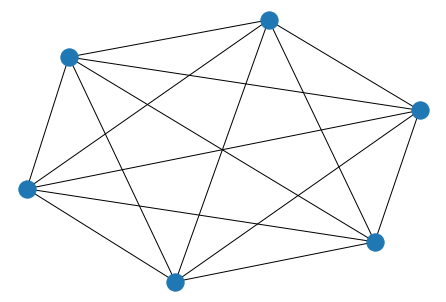

In [6]:
nx.draw(G)

In [7]:
def H_matrix(graph,edge_weights,no_of_qubits):
    # edge_weights= $\theta_1$ parameters for interaction terms
    # node_weights= $\theta_2$ parameters for single qubit terms
    
    full_matrix=np.zeros((2**no_of_qubits,2**no_of_qubits))
    
    # creating the two qubit interation terms:
    for i,edge in enumerate(graph.edges):
        
        zz_int=1
        
        for qubit in range(no_of_qubits):
            
            if qubit in edge:
                # for only ZZ interaction 
                zz_int=np.kron(zz_int,qml.PauliZ.matrix)
                
            else:
                zz_int=np.kron(zz_int,np.identity(2))
                
        full_matrix+=edge_weights[i]*zz_int*(-1)
        
        
    for i,edge in enumerate(graph.edges):
        
        xx_int=1
        
        for qubit in range(no_of_qubits):
            
            if qubit in edge:
                # for only XX interaction 
                xx_int=np.kron(xx_int,qml.PauliX.matrix)
                
            else:
                xx_int=np.kron(xx_int,np.identity(2))
                
        full_matrix+=edge_weights[i]*xx_int*(-1)
        
       
    for i,edge in enumerate(graph.edges):
        
        yy_int=1
        
        for qubit in range(no_of_qubits):
            
            if qubit in edge:
                # for only YY interaction 
                yy_int=np.kron(yy_int,qml.PauliY.matrix)
                
            else:
                yy_int=np.kron(yy_int,np.identity(2))
                
        full_matrix = full_matrix + edge_weights[i]*yy_int*(-1)
    
    return full_matrix

In [8]:
# generating gaussian numbers from box muller transformation

def generategaussian(n,var,mean):
    arr=[]
    
    u1=np.random.rand(n)
    u2=np.random.rand(n)
    arr.append(np.sqrt(var)*np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)+mean)
    arr.append(np.sqrt(var)*np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)+mean)
        
    return arr

In [9]:
Gaussians=generategaussian(10000,1,0)

In [10]:
from pylab import show,hist,subplot,figure

(array([[   4.,   72.,  406., 1407., 2616., 2850., 1837.,  650.,  142.,
           16.],
        [   5.,   54.,  371., 1353., 2679., 2929., 1828.,  643.,  117.,
           21.]]),
 array([-3.99391589, -3.22235323, -2.45079056, -1.6792279 , -0.90766523,
        -0.13610256,  0.6354601 ,  1.40702277,  2.17858543,  2.9501481 ,
         3.72171077]),
 <a list of 2 BarContainer objects>)

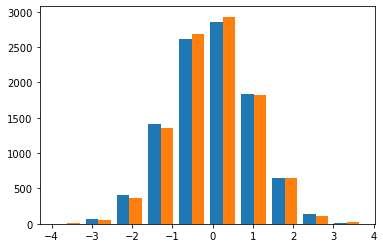

In [11]:
figure()
hist(Gaussians)

Defining the three variables except the interaction terms in the below cell

In [36]:
'''
Only the number of "runs" in the below cell should vary  
'''

'\nOnly the number of "runs" in the below cell should vary  \n'

In [12]:
run=100 # the number of times you have to repeat the experiment
# no transverse field in this model
mean=1  # mean value of the gaussian interactions Jij
var=np.linspace(0.1,2,10)  # variance of the gaussian interactions Jij
var

array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ])

In [13]:
min_energy=[]
gaussian_arr=[]

In [14]:
start_time = time.time() 
for v in var:
    for i in range(run):
        edge_weights =generategaussian(len(G.edges),v,mean)[0]
        gaussian_arr.append(edge_weights)
        Ham=H_matrix(G,edge_weights,qubit_number)
        min_energy.append(np.real_if_close(min(np.linalg.eig(Ham)[0])))
print("Total elements",len(min_energy))
end_time = time.time()
print('Total time taken: ', (end_time-start_time)/60, ' mins.')

Total elements 1000
Total time taken:  0.7220337231953938  mins.


In [15]:
np.sum(min_energy[50:100])/len(min_energy[50:100])

-14.980711351838444

In [16]:
min_eng=[]
for j in range(len(var)):
    min_eng.append(np.sum(min_energy[run*j:run*(j+1)])/len(min_energy[run*j:run*(j+1)]))

(min_eng)

[-15.060673134700219,
 -14.973915672424043,
 -15.376263425133953,
 -15.631636070732673,
 -15.409135484431028,
 -15.610455603215122,
 -15.905856903841363,
 -16.581200364202573,
 -17.073492820595888,
 -17.834861114316833]

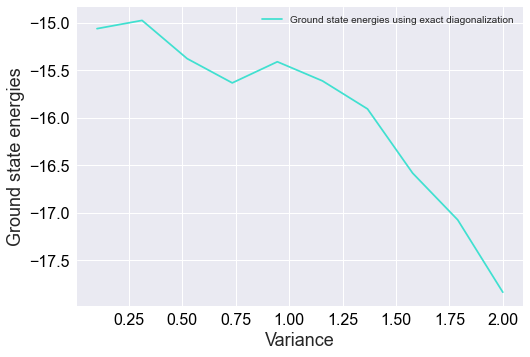

In [17]:
plt.style.use("seaborn")
#x=np.linspace(1,100,100)
plt.plot(var,min_eng,"turquoise",label="Ground state energies using exact diagonalization")
plt.ylabel("Ground state energies", fontsize=18)
plt.xlabel("Variance", fontsize=18)
plt.tick_params(axis="both", colors='black',which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", colors='black', which="minor", labelsize=16)
#plt.ylim(-7,-3)
plt.legend()
plt.show()

In [18]:
#####################################################

Try couple of times to make the above plot as much as smooth, if that doesn't work try to increase the "run by 20" 

In [19]:
#####################################################

In [20]:
print(f"Minimum average eigen energies:{min_eng}")

Minimum average eigen energies:[-15.060673134700219, -14.973915672424043, -15.376263425133953, -15.631636070732673, -15.409135484431028, -15.610455603215122, -15.905856903841363, -16.581200364202573, -17.073492820595888, -17.834861114316833]


In [21]:
dev = qml.device("lightning.qubit", wires= qubit_number) # 16 register qubits 

In [22]:
wires=list(range(qubit_number)) # will be used below
print("length of wires",len(wires))
for i in wires:
    print("wire->",i)
print("length of edges",len(G.edges))

length of wires 6
wire-> 0
wire-> 1
wire-> 2
wire-> 3
wire-> 4
wire-> 5
length of edges 15


In [23]:
'''
For a complete graph the below ansatz has to be defined separately
'''

'\nFor a complete graph the below ansatz has to be defined separately\n'

In [24]:
# Hardware efficient ansatz from paper "Certified variational quantum algorithms for eigenstate preparation"

def ansatz(l):
    
    if len(l)!=Rx_Rz_layers*qubit_number+qubit_number+1:
        raise ValueError("Number of parameters are not correct")  # or Rx_Rz_layers*len(G.nodes)+len(G.edges)+1 "+1" because the 
                                                                  # controlled Ry are operated in cyclic way 
    # single qubit gates Rx and Ry layers..............
    
    for j in range(Rx_Rz_layers):
        if j/2==0:
            for i in range(qubit_number):
                qml.RX(l[i+qubit_number*j],wires=i)
            
        
        if j/2!=0:
            for i in range(qubit_number):
                qml.RZ(l[i+qubit_number*j],wires=i)
        
    l=l[len(G.nodes)*Rx_Rz_layers:]
    
   # end...............................................

   # Two qubit controlled Ry...........................
    for w in wires:
        if w<qubit_number-1:
            qml.CRY(l[w],wires=[w,w+1])    
        else:
            qml.CRY(l[w],wires=[w,0])
            
   # end...............................................


In [25]:
coeffs_toy = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
#qml.PauliZ(15)@qml.PauliZ(0),
obs_toy = [
    qml.PauliZ(0)@qml.PauliZ(1), qml.PauliZ(1)@qml.PauliZ(2), qml.PauliZ(2)@qml.PauliZ(3), qml.PauliZ(3)@qml.PauliZ(4),
     qml.PauliZ(4)@qml.PauliZ(5),qml.PauliZ(5)@qml.PauliZ(6),qml.PauliZ(6)@qml.PauliZ(7),qml.PauliZ(7)@qml.PauliZ(8),
    qml.PauliZ(8)@qml.PauliZ(9),qml.PauliZ(9)@qml.PauliZ(10),qml.PauliZ(10)@qml.PauliZ(11),qml.PauliZ(11)@qml.PauliZ(12),
    qml.PauliZ(12)@qml.PauliZ(13),qml.PauliZ(13)@qml.PauliZ(14),qml.PauliZ(14)@qml.PauliZ(15),
    qml.PauliX(0),qml.PauliX(1),qml.PauliX(2),qml.PauliX(3),qml.PauliX(4),qml.PauliX(5),qml.PauliX(6),qml.PauliX(7)
    ,qml.PauliX(8),qml.PauliX(9),qml.PauliX(10),qml.PauliX(11),qml.PauliX(12),qml.PauliX(13),qml.PauliX(14),qml.PauliX(15)

]
H_toy = qml.Hamiltonian(coeffs_toy, obs_toy)
print(H_toy)

  (-1) [X0]
+ (-1) [X1]
+ (-1) [X2]
+ (-1) [X3]
+ (-1) [X4]
+ (-1) [X5]
+ (-1) [X6]
+ (-1) [X7]
+ (-1) [X8]
+ (-1) [X9]
+ (-1) [X10]
+ (-1) [X11]
+ (-1) [X12]
+ (-1) [X13]
+ (-1) [X14]
+ (-1) [X15]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z2 Z3]
+ (-1) [Z3 Z4]
+ (-1) [Z4 Z5]
+ (-1) [Z5 Z6]
+ (-1) [Z6 Z7]
+ (-1) [Z7 Z8]
+ (-1) [Z8 Z9]
+ (-1) [Z9 Z10]
+ (-1) [Z10 Z11]
+ (-1) [Z11 Z12]
+ (-1) [Z12 Z13]
+ (-1) [Z13 Z14]
+ (-1) [Z14 Z15]


In [26]:
gaussian_arr[59]

array([1.91403976, 1.00365198, 0.39135717, 0.86505062, 0.97922993,
       1.11890702, 0.60106041, 0.78143241, 0.89506584, 1.07252771,
       1.08605791, 0.76166313, 0.27408106, 1.55932727, 1.54780461])

In [27]:
coeffs_arr=[]
for v1,v in enumerate(var):
    for i in range(run):
        coeffs =np.concatenate([-gaussian_arr[i+run*v1] for k in range(3)]) # [-1,-1,-1,-1,-1,-g,-g,-g,-g,-g,-g]
        coeffs_arr.append(coeffs)
(coeffs_arr)[59]

array([-1.91403976, -1.00365198, -0.39135717, -0.86505062, -0.97922993,
       -1.11890702, -0.60106041, -0.78143241, -0.89506584, -1.07252771,
       -1.08605791, -0.76166313, -0.27408106, -1.55932727, -1.54780461,
       -1.91403976, -1.00365198, -0.39135717, -0.86505062, -0.97922993,
       -1.11890702, -0.60106041, -0.78143241, -0.89506584, -1.07252771,
       -1.08605791, -0.76166313, -0.27408106, -1.55932727, -1.54780461,
       -1.91403976, -1.00365198, -0.39135717, -0.86505062, -0.97922993,
       -1.11890702, -0.60106041, -0.78143241, -0.89506584, -1.07252771,
       -1.08605791, -0.76166313, -0.27408106, -1.55932727, -1.54780461])

The printed values in the above cell will be -$J_{ij}$. As in the hamiltonian below there is a -ve sign before these coefficients

In [28]:
obs=[]
for i in range(qubit_number):
    for j in range(qubit_number):
        if i<j:
            obs.append(qml.PauliZ(i)@qml.PauliZ(j))

print(obs)

[PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[0]) @ PauliZ(wires=[2]), PauliZ(wires=[0]) @ PauliZ(wires=[3]), PauliZ(wires=[0]) @ PauliZ(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[5]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[1]) @ PauliZ(wires=[3]), PauliZ(wires=[1]) @ PauliZ(wires=[4]), PauliZ(wires=[1]) @ PauliZ(wires=[5]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[2]) @ PauliZ(wires=[4]), PauliZ(wires=[2]) @ PauliZ(wires=[5]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[3]) @ PauliZ(wires=[5]), PauliZ(wires=[4]) @ PauliZ(wires=[5])]


In [29]:
H=[]

obs=[]
for i in range(qubit_number):
    for j in range(qubit_number):
        if i<j:
            obs.append(qml.PauliZ(i)@qml.PauliZ(j))

for i in range(qubit_number):
    for j in range(qubit_number):
        if i<j:
            obs.append(qml.PauliX(i)@qml.PauliX(j))

for i in range(qubit_number):
    for j in range(qubit_number):
        if i<j:
            obs.append(qml.PauliY(i)@qml.PauliY(j))
for v1 in range(len(var)):
    for i in range(run):
        H.append(qml.Hamiltonian(coeffs_arr[i+run*v1], obs))
print((H[59]))
print(len(H))

  (-1.9140397609322635) [Z0 Z1]
+ (-1.9140397609322635) [X0 X1]
+ (-1.9140397609322635) [Y0 Y1]
+ (-1.5593272680357733) [Z3 Z5]
+ (-1.5593272680357733) [X3 X5]
+ (-1.5593272680357733) [Y3 Y5]
+ (-1.5478046056509764) [Z4 Z5]
+ (-1.5478046056509764) [X4 X5]
+ (-1.5478046056509764) [Y4 Y5]
+ (-1.1189070248156272) [Z1 Z2]
+ (-1.1189070248156272) [X1 X2]
+ (-1.1189070248156272) [Y1 Y2]
+ (-1.086057912713563) [Z2 Z4]
+ (-1.086057912713563) [X2 X4]
+ (-1.086057912713563) [Y2 Y4]
+ (-1.0725277109304312) [Z2 Z3]
+ (-1.0725277109304312) [X2 X3]
+ (-1.0725277109304312) [Y2 Y3]
+ (-1.003651980727232) [Z0 Z2]
+ (-1.003651980727232) [X0 X2]
+ (-1.003651980727232) [Y0 Y2]
+ (-0.9792299272315751) [Z0 Z5]
+ (-0.9792299272315751) [X0 X5]
+ (-0.9792299272315751) [Y0 Y5]
+ (-0.8950658432190296) [Z1 Z5]
+ (-0.8950658432190296) [X1 X5]
+ (-0.8950658432190296) [Y1 Y5]
+ (-0.865050624945847) [Z0 Z4]
+ (-0.865050624945847) [X0 X4]
+ (-0.865050624945847) [Y0 Y4]
+ (-0.7814324124057549) [Z1 Z4]
+ (-0.78143241240

In [30]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])

In [31]:
Trotter_steps=1 # Should remain 1

In [32]:
Rx_Rz_layers=3 # Should remain 3

In [33]:
params=np.random.rand(Rx_Rz_layers*qubit_number+qubit_number+1)*0.1

In [34]:
#@qml.qnode(dev)
def full_HVA_ansatz(params, **kwargs):
    
    #for i in range(Trotter_steps):
    ansatz(params)
    
    #return qml.state()  

In [35]:
start_time = time.time()    
cost_fn_arr=[]
for v in range(len(var)):
    for i in range(run):
        cost_fn=qml.ExpvalCost(full_HVA_ansatz,H[i+run*v],dev)
        cost_fn_arr.append(cost_fn)
    
len(cost_fn_arr)
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Time taken:  0.11393052339553833  mins.


In [94]:
#cost_fn=qml.ExpvalCost(full_HVA_2,H[0],dev)

In [101]:
par_arr=[]
costarr=[]
opt_val_arr=[]

In [102]:
start_time = time.time()    
for v1,v in enumerate(var):
    for i in range(run):
    #par_arr=[]
    #costarr=[]
        optimizer = qml.AdamOptimizer(stepsize=0.1)
        params=np.random.rand(Rx_Rz_layers*qubit_number+qubit_number+1)*0.1
        
        start_time2 = time.time()
        
        for j in range(0, 100+1):
            params, cost = optimizer.step_and_cost(cost_fn_arr[i+run*v1], params)

    # Prints the value of the cost function
            if j!=0 and j % 100 == 0:
                print(f"Cost at Step {j} of {i}th run for variance {v}: {cost}")
                
                end_time2 = time.time()
                print('Time taken at this step: ', (end_time2-start_time2)/60, ' mins.')
                
                costarr.append(cost)
                par_arr.append(params)
        opt_val_arr.append(cost)

end_time = time.time()
print('Total time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 100 of 0th run for variance 0.1: -5.365039086649093
Time taken at this step:  1.8790928244590759  mins.
Cost at Step 100 of 1th run for variance 0.1: -6.470656402966566
Time taken at this step:  1.9024385730425517  mins.
Cost at Step 100 of 2th run for variance 0.1: -6.554192648983802
Time taken at this step:  1.8993587652842203  mins.
Cost at Step 100 of 3th run for variance 0.1: -6.8338586314192185
Time taken at this step:  1.9118437886238098  mins.
Cost at Step 100 of 4th run for variance 0.1: -5.429920354698296
Time taken at this step:  1.934061296780904  mins.
Cost at Step 100 of 5th run for variance 0.1: -5.93232174912859
Time taken at this step:  1.9062954227129618  mins.
Cost at Step 100 of 6th run for variance 0.1: -6.524919895203843
Time taken at this step:  1.930724573135376  mins.
Cost at Step 100 of 7th run for variance 0.1: -5.551182530399447
Time taken at this step:  1.8721945405006408  mins.
Cost at Step 100 of 8th run for variance 0.1: -7.37139238458188
Ti

KeyboardInterrupt: 

In [106]:
optimaleng=[]
for j in range(len(var)-3):
    optimaleng.append(np.sum(costarr[run*j:run*(j+1)])/len(costarr[run*j:run*(j+1)]))

(optimaleng)

[-5.844997307245039,
 -6.086804546937355,
 -6.127980316432971,
 -5.9804041886402,
 -6.383247075588741,
 -6.407991674995385,
 -6.884153656647725]

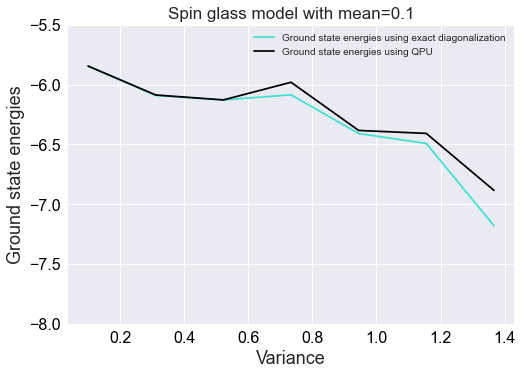

In [115]:
plt.style.use("seaborn")
#x=np.linspace(1,100,100)
plt.plot(var[:7],min_eng[:7],"turquoise",label="Ground state energies using exact diagonalization")
plt.plot(var[:7],optimaleng,"black",label="Ground state energies using QPU")
plt.ylabel("Ground state energies", fontsize=18)
plt.xlabel("Variance", fontsize=18)
plt.tick_params(axis="both", colors='black',which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", colors='black', which="minor", labelsize=16)
plt.title("Spin glass model with mean=0.1", fontsize=17)
plt.ylim(-8, -5.5)
plt.legend()
plt.show()

In [117]:
min_eng_arr=[]
for j in range(len(var)):
    min_eng_arr.append(min_energy[run*j:run*(j+1)])


variences1=[]
for i in range(len(var)):
    variences1.append(np.std(min_eng_arr[i]))
    

opt_eng_arr=[]
for j in range(len(var)-3):
    opt_eng_arr.append(costarr[run*j:run*(j+1)])
    
variences2=[]
for i in range(len(var)-3):
    variences2.append(np.std(opt_eng_arr[i]))
    
variences2==variences1


False

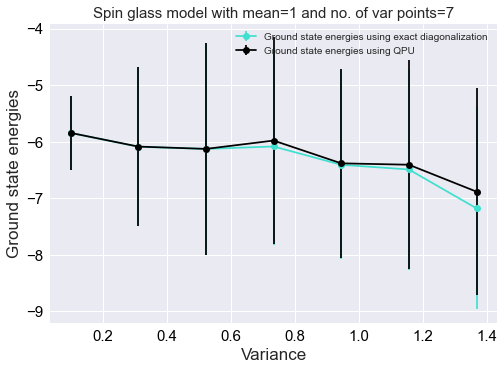

In [121]:
fig, ax = plt.subplots()


ax.errorbar(var[:7], min_eng[:7],
            yerr=variences1[:7],
            fmt='-o',color="turquoise",label="Ground state energies using exact diagonalization")

ax.errorbar(var[:7], optimaleng,
            yerr=variences2,
            fmt='-o',color="black",label="Ground state energies using QPU")

ax.set_xlabel('Variance', fontsize=17)
ax.set_ylabel('Ground state energies', fontsize=17)
ax.set_title(f'Spin glass model with mean={mean} and no. of var points={len(var)-3}', fontsize=15)
plt.tick_params(axis="both", colors='black',which="major", labelsize=15)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", colors='black', which="minor", labelsize=15)
#plt.ylim(-12,-4)
plt.legend()
plt.show()
# this is using hardware efficient ansatz not HVA

In [124]:
np.linalg.norm(np.array(min_eng[:7])-np.array(optimaleng)) # gives the L_2 norm between true and observed ground state using QC

0.3254639931304318

In [99]:
@qml.qnode(dev)
def final_state_2(params,**kwargs):
    
    zz_params=params[:len(G.edges)]
    x_params=params[len(G.edges):]
    [qml.Hadamard(wires=w) for w in range(qubit_number)]
    
    for n in range(Trotter_steps):
        
        HVA_layer(zz_params,x_params)
    return qml.state()   

In [100]:
cost_fn_test=qml.ExpvalCost(full_HVA_2,H[len(H)-1],dev)
cost_fn_test(params)
print(f"Ground state energy:{cost_fn_test(params)}")

Ground state energy:-8.431066749370274


In [101]:
final_state_2(params)  # This is the last ket state which has ground state energy -12.757099592485492

tensor([0.0512708 -0.00613873j, 0.09214983+0.00458714j,
        0.31748384-0.00165358j, 0.16328437+0.00092672j,
        0.16298365-0.00022786j, 0.31699313-0.00376187j,
        0.09372369+0.00184853j, 0.05204609-0.0075301j ,
        0.02419963-0.00463641j, 0.04356295-0.00133525j,
        0.14736612-0.00262024j, 0.07570261-0.00056334j,
        0.07686585+0.00051743j, 0.14931834-0.0006373j ,
        0.04335664+0.00413221j, 0.02409473-0.00187357j,
        0.01689816-0.00092924j, 0.03028924+0.00357023j,
        0.10438655+0.00196278j, 0.05372191+0.00159952j,
        0.05292221+0.0008556j , 0.10304514+0.00059688j,
        0.03042088-0.00019806j, 0.01696512-0.00283377j,
        0.03596324-0.00536454j, 0.06481069+0.0009886j ,
        0.21908626-0.00356369j, 0.1126495 -0.0006539j ,
        0.112857  +0.00015715j, 0.21942452-0.00208459j,
        0.06367754+0.00290126j, 0.03540452-0.00439315j,
        0.03540452-0.00439315j, 0.06367754+0.00290126j,
        0.21942452-0.00208459j, 0.112857  +0.000